In [14]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import gzip
import pickle
import pandasql
import decimal

In [15]:
path = 'zippedData/im.db'
conn = sqlite3.connect(path)

cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

table_names = cur.fetchall() # Fetch the result and store it in table_names
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [16]:
cur.execute("""SELECT * FROM movie_basics;""")

In [17]:
df = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """, conn)
df[df['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [18]:
movie_basics=pd.read_sql("""SELECT * FROM movie_basics ;""", conn)
movie_basics = movie_basics.rename(columns={'primary_title': 'movie'})
movie_basics

,movie_id,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [19]:
pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('movie_basics');""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,primary_title,TEXT,0,None,0
2,2,original_title,TEXT,0,None,0
3,3,start_year,INTEGER,0,None,0
4,4,runtime_minutes,REAL,0,None,0
5,5,genres,TEXT,0,None,0


In [20]:
pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('directors');""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,person_id,TEXT,0,None,0


In [21]:
directors=pd.read_sql(
"""
SELECT *
FROM directors
;
""", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [22]:
pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('known_for');""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,person_id,TEXT,0,None,0
1,1,movie_id,TEXT,0,None,0


In [23]:
known_for=pd.read_sql(
"""
SELECT *
FROM known_for
;
""", conn)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [24]:
pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('movie_akas');""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,ordering,INTEGER,0,None,0
2,2,title,TEXT,0,None,0
3,3,region,TEXT,0,None,0
4,4,language,TEXT,0,None,0
5,5,types,TEXT,0,None,0
6,6,attributes,TEXT,0,None,0
7,7,is_original_title,REAL,0,None,0


In [25]:
movie_akas=pd.read_sql(
"""
SELECT *
FROM movie_akas
;
""", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [26]:
pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('movie_ratings');""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,averagerating,REAL,0,None,0
2,2,numvotes,INTEGER,0,None,0


In [27]:
movie_ratings=pd.read_sql(
"""
SELECT *
FROM movie_ratings
;
""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [28]:
persons=pd.read_sql(
"""
SELECT *
FROM persons
;
""", conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [29]:
pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('persons');""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,person_id,TEXT,0,None,0
1,1,primary_name,TEXT,0,None,0
2,2,birth_year,REAL,0,None,0
3,3,death_year,REAL,0,None,0
4,4,primary_profession,TEXT,0,None,0


In [30]:
principals=pd.read_sql(
"""
SELECT *
FROM principals
;
""", conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [31]:
pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('principals');""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,ordering,INTEGER,0,None,0
2,2,person_id,TEXT,0,None,0
3,3,category,TEXT,0,None,0
4,4,job,TEXT,0,None,0
5,5,characters,TEXT,0,None,0


In [32]:
writers=pd.read_sql(
"""
SELECT *
FROM writers
;
""", conn)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [33]:
pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('writers');""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,person_id,TEXT,0,None,0


In [35]:
merged_data33 = pd.merge(movie_basics, movie_ratings, on='movie_id')
merged_data33 = pd.merge(merged_data33, movie_akas, on='movie_id')
merged_data33 = merged_data33.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)
merged_data33

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,in,hi,nan,alternative transliteration,0.0
1,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,2,sunghursh,nan,nan,original,nan,1.0
2,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,3,sunghursh,in,nan,nan,nan,0.0
3,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,4,sunghursh,in,hi,nan,alternative transliteration,0.0
4,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,5,sungharsh,in,hi,nan,alternative spelling,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,pengalila,pengalila,2019,111.0,drama,8.4,600,2,sisterleaf,in,en,nan,literal english title,0.0
261802,tt9905462,pengalila,pengalila,2019,111.0,drama,8.4,600,3,pengalila,in,nan,nan,nan,0.0
261803,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,1,padmavyuhathile abhimanyu,nan,nan,original,nan,1.0
261804,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,2,pathmavyuhathile abhimanyu,in,ml,nan,alternative spelling,0.0


In [41]:
df1 = pd.read_sql("""SELECT mb.genres, mb.runtime_minutes, mb.start_year, mb.movie_id, mb.primary_title, ma.region, ma.language, ma.title
FROM movie_basics mb
JOIN movie_akas ma ON mb.movie_id = ma.movie_id;
""", conn)
df1 = df1.rename(columns={'title': 'movie'})
df1.drop_duplicates(subset=['movie'], inplace=True)
df1

,genres,runtime_minutes,start_year,movie_id,primary_title,region,language,movie
0,"Action,Crime,Drama",175.0,2013,tt0063540,Sunghursh,IN,hi,Sangharsh
1,"Action,Crime,Drama",175.0,2013,tt0063540,Sunghursh,IN,hi,Sungharsh
2,"Action,Crime,Drama",175.0,2013,tt0063540,Sunghursh,None,None,Sunghursh
5,"Biography,Drama",114.0,2019,tt0066787,One Day Before the Rainy Season,None,None,Ashad Ka Ek Din
7,"Biography,Drama",114.0,2019,tt0066787,One Day Before the Rainy Season,XWW,en,One Day Before the Rainy Season
...,...,...,...,...,...,...,...,...
331694,Documentary,52.0,2019,tt9913248,Nepal - Homebird,None,None,Népal - À chacun sa voie
331695,Documentary,85.0,2019,tt9914254,A Cherry Tale,XWW,en,A Cherry Tale
331696,Documentary,85.0,2019,tt9914254,A Cherry Tale,None,None,Kirsebæreventyret
331699,Documentary,70.0,2019,tt9915436,Vida em Movimento,None,None,Vida em Movimento


In [42]:
merged_888 = merged_data33.merge(df1, on='movie_id', how='inner')
merged_888

,movie_id,movie_x,original_title,start_year_x,runtime_minutes_x,genres_x,averagerating,numvotes,ordering,title,...,types,attributes,is_original_title,genres_y,runtime_minutes_y,start_year_y,primary_title,region_y,language_y,movie_y
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,...,nan,alternative transliteration,0.0,"Action,Crime,Drama",175.0,2013,Sunghursh,IN,hi,Sangharsh
1,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,...,nan,alternative transliteration,0.0,"Action,Crime,Drama",175.0,2013,Sunghursh,IN,hi,Sungharsh
2,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,...,nan,alternative transliteration,0.0,"Action,Crime,Drama",175.0,2013,Sunghursh,None,None,Sunghursh
3,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,2,sunghursh,...,original,nan,1.0,"Action,Crime,Drama",175.0,2013,Sunghursh,IN,hi,Sangharsh
4,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,2,sunghursh,...,original,nan,1.0,"Action,Crime,Drama",175.0,2013,Sunghursh,IN,hi,Sungharsh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159570,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,2,pathmavyuhathile abhimanyu,...,nan,alternative spelling,0.0,Drama,130.0,2019,Padmavyuhathile Abhimanyu,None,None,Padmavyuhathile Abhimanyu
2159571,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,2,pathmavyuhathile abhimanyu,...,nan,alternative spelling,0.0,Drama,130.0,2019,Padmavyuhathile Abhimanyu,IN,ml,Pathmavyuhathile Abhimanyu
2159572,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,3,padmavyoohathile abhimanyu,...,nan,alternative spelling,0.0,Drama,130.0,2019,Padmavyuhathile Abhimanyu,IN,ml,Padmavyoohathile Abhimanyu
2159573,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,3,padmavyoohathile abhimanyu,...,nan,alternative spelling,0.0,Drama,130.0,2019,Padmavyuhathile Abhimanyu,None,None,Padmavyuhathile Abhimanyu


In [43]:
merged_8887 = merged_888.drop(['attributes', 'types', 'language_y', 'original_title', 'movie_y', 'primary_title', 'genres_y'], axis=1)
merged_8887

,movie_id,movie_x,start_year_x,runtime_minutes_x,genres_x,averagerating,numvotes,ordering,title,region_x,language_x,is_original_title,runtime_minutes_y,start_year_y,region_y
0,tt0063540,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,in,hi,0.0,175.0,2013,IN
1,tt0063540,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,in,hi,0.0,175.0,2013,IN
2,tt0063540,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,in,hi,0.0,175.0,2013,None
3,tt0063540,sunghursh,2013,175.0,"action,crime,drama",7.0,77,2,sunghursh,nan,nan,1.0,175.0,2013,IN
4,tt0063540,sunghursh,2013,175.0,"action,crime,drama",7.0,77,2,sunghursh,nan,nan,1.0,175.0,2013,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159570,tt9911774,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,2,pathmavyuhathile abhimanyu,in,ml,0.0,130.0,2019,None
2159571,tt9911774,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,2,pathmavyuhathile abhimanyu,in,ml,0.0,130.0,2019,IN
2159572,tt9911774,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,3,padmavyoohathile abhimanyu,in,ml,0.0,130.0,2019,IN
2159573,tt9911774,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,3,padmavyoohathile abhimanyu,in,ml,0.0,130.0,2019,None


,genres,runtime_minutes,start_year,movie_id,primary_title,region,language,movie
0,"Action,Crime,Drama",175.0,2013,tt0063540,Sunghursh,IN,hi,Sangharsh
1,"Action,Crime,Drama",175.0,2013,tt0063540,Sunghursh,IN,hi,Sungharsh
2,"Action,Crime,Drama",175.0,2013,tt0063540,Sunghursh,None,None,Sunghursh
5,"Biography,Drama",114.0,2019,tt0066787,One Day Before the Rainy Season,None,None,Ashad Ka Ek Din
7,"Biography,Drama",114.0,2019,tt0066787,One Day Before the Rainy Season,XWW,en,One Day Before the Rainy Season
...,...,...,...,...,...,...,...,...
331694,Documentary,52.0,2019,tt9913248,Nepal - Homebird,None,None,Népal - À chacun sa voie
331695,Documentary,85.0,2019,tt9914254,A Cherry Tale,XWW,en,A Cherry Tale
331696,Documentary,85.0,2019,tt9914254,A Cherry Tale,None,None,Kirsebæreventyret
331699,Documentary,70.0,2019,tt9915436,Vida em Movimento,None,None,Vida em Movimento


In [44]:
runtime=pd.read_sql("""SELECT movie_id, primary_title, runtime_minutes
FROM movie_basics
;
""", conn)
runtime

,movie_id,primary_title,runtime_minutes
0,tt0063540,Sunghursh,175.0
1,tt0066787,One Day Before the Rainy Season,114.0
2,tt0069049,The Other Side of the Wind,122.0
3,tt0069204,Sabse Bada Sukh,NaN
4,tt0100275,The Wandering Soap Opera,80.0
...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,123.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN
146141,tt9916706,Dankyavar Danka,NaN
146142,tt9916730,6 Gunn,116.0


In [ ]:
#merged_df22 = pd.merge(directors, known_for, on='person_id', how='outer')
#merged_df22= pd.merge(merged_df22, persons, on='person_id', how='outer')
#merged_df22 = pd.merge(merged_df22, principals, on='person_id', how='outer')
#merged_df22 = pd.merge(merged_df22, writers, on='person_id', how='outer')
#merged_df22

## DATAFRAMES

In [45]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
rt_reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding='unicode_escape')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [46]:
with gzip.open('zippedData/bom.movie_gross.csv.gz', 'rb') as f:
    movie_gross = pd.read_csv(f)
for col in movie_gross.select_dtypes(include=['object']):
    movie_gross[col] = movie_gross[col].str.lower()

movie_gross = movie_gross.rename(columns={'title': 'movie'})
    
movie_grossCLEAN = movie_gross.applymap(lambda x: str(x).replace(',', '').replace('$', ''))
movie_grossCLEAN

,movie,studio,domestic_gross,foreign_gross,year
0,toy story 3,bv,415000000.0,652000000,2010
1,alice in wonderland (2010),bv,334200000.0,691300000,2010
2,harry potter and the deathly hallows part 1,wb,296000000.0,664300000,2010
3,inception,wb,292600000.0,535700000,2010
4,shrek forever after,p/dw,238700000.0,513900000,2010
...,...,...,...,...,...
3382,the quake,magn.,6200.0,nan,2018
3383,edward ii (2018 re-release),fm,4800.0,nan,2018
3384,el pacto,sony,2500.0,nan,2018
3385,the swan,synergetic,2400.0,nan,2018


In [47]:
with gzip.open('zippedData/rt.movie_info.tsv.gz', 'rb') as f:
    movie_info = pd.read_csv(f, delimiter='\t', encoding='unicode_escape')
for col in movie_info.select_dtypes(include=['object']):
    movie_info[col] = movie_info[col].str.lower()
    
movie_infoCLEAN = movie_info.applymap(lambda x: str(x).replace(',', '').replace('$', ''))
movie_infoCLEAN

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,this gritty fast-paced and innovative police d...,r,action and adventure|classics|drama,william friedkin,ernest tidyman,oct 9 1971,sep 25 2001,nan,nan,104 minutes,nan
1,3,new york city not-too-distant-future: eric pac...,r,drama|science fiction and fantasy,david cronenberg,david cronenberg|don delillo,aug 17 2012,jan 1 2013,,600000,108 minutes,entertainment one
2,5,illeana douglas delivers a superb performance ...,r,drama|musical and performing arts,allison anders,allison anders,sep 13 1996,apr 18 2000,nan,nan,116 minutes,nan
3,6,michael douglas runs afoul of a treacherous su...,r,drama|mystery and suspense,barry levinson,paul attanasio|michael crichton,dec 9 1994,aug 27 1997,nan,nan,128 minutes,nan
4,7,nan,nr,drama|romance,rodney bennett,giles cooper,nan,nan,nan,nan,200 minutes,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,forget terrorists or hijackers -- there's a ha...,r,action and adventure|horror|mystery and suspense,nan,nan,aug 18 2006,jan 2 2007,,33886034,106 minutes,new line cinema
1556,1997,the popular saturday night live sketch was exp...,pg,comedy|science fiction and fantasy,steve barron,terry turner|tom davis|dan aykroyd|bonnie turner,jul 23 1993,apr 17 2001,nan,nan,88 minutes,paramount vantage
1557,1998,based on a novel by richard powell when the lo...,g,classics|comedy|drama|musical and performing arts,gordon douglas,nan,jan 1 1962,may 11 2004,nan,nan,111 minutes,nan
1558,1999,the sandlot is a coming-of-age story about a g...,pg,comedy|drama|kids and family|sports and fitness,david mickey evans,david mickey evans|robert gunter,apr 1 1993,jan 29 2002,nan,nan,101 minutes,nan


In [48]:
with gzip.open('zippedData/rt.reviews.tsv.gz', 'rb') as f:
    rt_reviews = pd.read_csv(f, delimiter='\t', encoding='unicode_escape')
for col in rt_reviews.select_dtypes(include=['object']):
    rt_reviews[col] = rt_reviews[col].str.lower()
    rt_reviewsCLEAN = rt_reviews.applymap(lambda x: str(x).replace(',', '').replace('$', ''))
rt_reviewsCLEAN

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,a distinctly gallows take on contemporary fina...,3/5,fresh,pj nabarro,0,patrick nabarro,november 10 2018
1,3,it's an allegory in search of a meaning that n...,nan,rotten,annalee newitz,0,io9.com,may 23 2018
2,3,... life lived in a bubble in financial dealin...,nan,fresh,sean axmaker,0,stream on demand,january 4 2018
3,3,continuing along a line introduced in last yea...,nan,fresh,daniel kasman,0,mubi,november 16 2017
4,3,... a perverse twist on neorealism...,nan,fresh,nan,0,cinema scope,october 12 2017
...,...,...,...,...,...,...,...,...
54427,2000,the real charm of this trifle is the deadpan c...,nan,fresh,laura sinagra,1,village voice,september 24 2002
54428,2000,nan,1/5,rotten,michael szymanski,0,zap2it.com,september 21 2005
54429,2000,nan,2/5,rotten,emanuel levy,0,emanuellevy.com,july 17 2005
54430,2000,nan,2.5/5,rotten,christopher null,0,filmcritic.com,september 7 2003


In [49]:
with gzip.open('zippedData/tmdb.movies.csv.gz', 'rb') as f:
    tmdb_movies = pd.read_csv(f)

for col in tmdb_movies.select_dtypes(include=['object']):
    tmdb_movies[col] = tmdb_movies[col].str.lower()

tmdb_movies = tmdb_movies.rename(columns={'original_title': 'movie'})
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].str.replace('[', '').str.replace(']', '')

tmdb_moviesCLEAN = tmdb_movies.applymap(lambda x: str(x).replace(',', '').replace('$', ''))

# Define a dictionary to map genre ID numbers to genre names
genre_id_mapping = {
    '28': 'action',
    '12': 'adventure',
    '16': 'animation',
    '35': 'comedy',
    '80': 'crime',
    '99': 'documentary',
    '18': 'drama',
    '10751': 'family',
    '14': 'fantasy',
    '36': 'history',
    '27': 'horror',
    '10402': 'music',
    '9648': 'mystery',
    '878': 'science fiction',
    '10770': 'tv movie',
    '53': 'thriller',
    '10752': 'war',
    '37': 'western'
}

# Replace genre ID numbers with genre names in the 'genre_ids' column
for genre_id, genre_name in genre_id_mapping.items():
    tmdb_moviesCLEAN['genre_ids'] = tmdb_moviesCLEAN['genre_ids'].str.replace(genre_id, genre_name)
tmdb_moviesCLEAN.rename(columns={'movie': 'movieNAME'}, inplace=True)
tmdb_moviesCLEAN

,Unnamed: 0,genre_ids,id,original_language,movieNAME,popularity,release_date,title,vote_average,vote_count
0,0,adventure fantasy family,12444,en,harry potter and the deathly hallows: part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788
1,1,fantasy adventure animation family,10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610
2,2,adventure action science fiction,10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368
3,3,animation comedy family,862,en,toy story,28.005,1995-11-22,toy story,7.9,10174
4,4,action science fiction adventure,27205,en,inception,27.92,2010-07-16,inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,horror drama,488143,en,laboratory conditions,0.6,2018-10-13,laboratory conditions,0.0,1
26513,26513,drama thriller,485975,en,_exhibit_84xxx_,0.6,2018-05-01,_exhibit_84xxx_,0.0,1
26514,26514,fantasy action adventure,381231,en,the last one,0.6,2018-10-01,the last one,0.0,1
26515,26515,family adventure action,366854,en,trailer made,0.6,2018-06-22,trailer made,0.0,1


In [50]:
with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f:
    movie_budgets = pd.read_csv(f)
# lowercase all strings
for col in movie_budgets.select_dtypes(include=['object']):
    movie_budgets[col] = movie_budgets[col].str.lower()
# remove all ',' and '$' delimiters 
    movie_budgetsCLEAN = movie_budgets.applymap(lambda x: str(x).replace(',', '').replace('$', ''))
movie_budgetsCLEAN

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,dec 18 2009,avatar,425000000,760507625,2776345279
1,2,may 20 2011,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,jun 7 2019,dark phoenix,350000000,42762350,149762350
3,4,may 1 2015,avengers: age of ultron,330600000,459005868,1403013963
4,5,dec 15 2017,star wars ep. viii: the last jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,dec 31 2018,red 11,7000,0,0
5778,79,apr 2 1999,following,6000,48482,240495
5779,80,jul 13 2005,return to the land of wonders,5000,1338,1338
5780,81,sep 29 2015,a plague so pleasant,1400,0,0


In [51]:
merged_df1 = pd.merge(movie_budgetsCLEAN, tmdb_moviesCLEAN, on='movie', how='inner')
merged_df1

KeyError: 'movie'

In [ ]:
tmdb_moviesCLEAN

In [ ]:
movie_budgetsCLEAN

In [ ]:
merged_df2 = pd.merge(tmdb_moviesCLEAN, movie_budgetsCLEAN, on='movie', how='inner')
merged_df2.drop_duplicates(subset=['movie'], inplace=True)
merged_df2

In [52]:
merged_df3 = pd.merge(movie_budgetsCLEAN, movie_grossCLEAN, on='movie', how='inner')
merged_df3['release_year'] = merged_df3['release_date'].str.extract(r'(\d{4})')
merged_df3

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,release_year
0,2,may 20 2011,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,bv,241100000.0,804600000,2011,2011
1,4,may 1 2015,avengers: age of ultron,330600000,459005868,1403013963,bv,459000000.0,946400000,2015,2015
2,7,apr 27 2018,avengers: infinity war,300000000,678815482,2048134200,bv,678800000.0,1369.5,2018,2018
3,9,nov 17 2017,justice league,300000000,229024295,655945209,wb,229000000.0,428900000,2017,2017
4,10,nov 6 2015,spectre,300000000,200074175,879620923,sony,200100000.0,680600000,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
1286,68,apr 27 2012,sound of my voice,135000,408015,429448,foxs,408000.0,nan,2012,2012
1287,73,jun 15 2012,your sister's sister,120000,1597486,3090593,ifc,1600000.0,nan,2012,2012
1288,80,jul 10 2015,the gallows,100000,22764410,41656474,wb (nl),22800000.0,20200000,2015,2015
1289,86,jul 7 2017,a ghost story,100000,1594798,2769782,a24,1600000.0,nan,2017,2017


In [55]:
movie_data = pd.merge(movie_gross, movie_info, on='studio', how='inner')
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5845 entries, 0 to 5844
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           5845 non-null   object 
 1   studio          515 non-null    object 
 2   domestic_gross  3713 non-null   float64
 3   foreign_gross   4632 non-null   object 
 4   year            5845 non-null   int64  
 5   id              5845 non-null   int64  
 6   synopsis        5540 non-null   object 
 7   rating          5830 non-null   object 
 8   genre           5805 non-null   object 
 9   director        5117 non-null   object 
 10  writer          4100 non-null   object 
 11  theater_date    4064 non-null   object 
 12  dvd_date        4064 non-null   object 
 13  currency        382 non-null    object 
 14  box_office      382 non-null    object 
 15  runtime         5720 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 776.3+ KB


In [56]:
movie_data

,movie,studio,domestic_gross,foreign_gross,year,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,harry potter and the deathly hallows part 1,wb,296000000.0,664300000,2010,611,"directed by clint eastwood, the mysterious dra...",r,drama|mystery and suspense,clint eastwood,brian helgeland,"oct 8, 2003","jun 8, 2004",$,"88,800,000",137 minutes
1,inception,wb,292600000.0,535700000,2010,611,"directed by clint eastwood, the mysterious dra...",r,drama|mystery and suspense,clint eastwood,brian helgeland,"oct 8, 2003","jun 8, 2004",$,"88,800,000",137 minutes
2,clash of the titans (2010),wb,163200000.0,330000000,2010,611,"directed by clint eastwood, the mysterious dra...",r,drama|mystery and suspense,clint eastwood,brian helgeland,"oct 8, 2003","jun 8, 2004",$,"88,800,000",137 minutes
3,due date,wb,100500000.0,111200000,2010,611,"directed by clint eastwood, the mysterious dra...",r,drama|mystery and suspense,clint eastwood,brian helgeland,"oct 8, 2003","jun 8, 2004",$,"88,800,000",137 minutes
4,yogi bear,wb,100200000.0,101300000,2010,611,"directed by clint eastwood, the mysterious dra...",r,drama|mystery and suspense,clint eastwood,brian helgeland,"oct 8, 2003","jun 8, 2004",$,"88,800,000",137 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,the children act,a24,548000.0,17000000,2018,1399,imagine the end of the world. now imagine some...,r,drama|horror,trey edward shults,trey edward shults,"jun 9, 2017","sep 12, 2017",$,"13,985,117",91 minutes
5841,lean on pete,a24,1200000.0,NaN,2018,1399,imagine the end of the world. now imagine some...,r,drama|horror,trey edward shults,trey edward shults,"jun 9, 2017","sep 12, 2017",$,"13,985,117",91 minutes
5842,journey to the south pacific,imax,7600000.0,6500000,2013,1255,mission: impossible iii director and alias cre...,pg-13,action and adventure|drama|science fiction and...,NaN,gene roddenberry|alex kurtzman|roberto orci,"may 7, 2009","nov 17, 2009",$,"257,704,099",127 minutes
5843,a beautiful planet,imax,15500000.0,9400000,2016,1255,mission: impossible iii director and alias cre...,pg-13,action and adventure|drama|science fiction and...,NaN,gene roddenberry|alex kurtzman|roberto orci,"may 7, 2009","nov 17, 2009",$,"257,704,099",127 minutes


In [57]:
# drop all 15 'nan' rows in rating
movie_data.dropna(subset=['rating'], inplace=True)
nan_count = movie_data['rating'].isna().sum()
nan_count

0

In [60]:
merged_df1['production_budget'] = merged_df1['production_budget'].astype(float)
merged_df1['popularity'] = merged_df1['popularity'].astype(float)

NameError: name 'merged_df1' is not defined

In [ ]:
corr_coef, _ = pearsonr(merged_df1['production_budget'], merged_df1['popularity'])
print(f"Pearson's correlation coefficient: {corr_coef}")

In [ ]:
merged_df1

In [ ]:
prob_rate60 = (merged_df1['popularity'] >= 15).mean()
prob_rate60

In [ ]:
merged_df3

In [ ]:
tmdb_moviesCLEAN

In [61]:
GENRES7 = tmdb_moviesCLEAN[['movieNAME', 'genre_ids']].copy()
GENRES7

,movieNAME,genre_ids
0,harry potter and the deathly hallows: part 1,adventure fantasy family
1,how to train your dragon,fantasy adventure animation family
2,iron man 2,adventure action science fiction
3,toy story,animation comedy family
4,inception,action science fiction adventure
...,...,...
26512,laboratory conditions,horror drama
26513,_exhibit_84xxx_,drama thriller
26514,the last one,fantasy action adventure
26515,trailer made,family adventure action


In [62]:
genre_id_mapping8 = {
    '28': 'action',
    '12': 'adventure',
    '16': 'animation',
    '35': 'comedy',
    '80': 'crime',
    '99': 'documentary',
    '18': 'drama',
    '10751': 'family',
    '14': 'fantasy',
    '36': 'history',
    '27': 'horror',
    '10402': 'music',
    '9648': 'mystery',
    '878': 'science fiction',
    '10770': 'tv movie',
    '53': 'thriller',
    '10752': 'war',
    '37': 'western'
}

# Split the genre_ids column into a list of strings
GENRES7['genre_ids'] = GENRES7['genre_ids'].str.split('|')

# Add a new column for each genre in the mapping
for genre_id, genre_name in genre_id_mapping.items():
    GENRES7[genre_name] = GENRES7['genre_ids'].apply(lambda x: genre_id in x).astype(int)
GENRES7

,movieNAME,genre_ids,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,history,horror,music,mystery,science fiction,tv movie,thriller,war,western
0,harry potter and the deathly hallows: part 1,[adventure fantasy family],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,how to train your dragon,[fantasy adventure animation family],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,iron man 2,[adventure action science fiction],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,toy story,[animation comedy family],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,inception,[action science fiction adventure],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,laboratory conditions,[horror drama],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26513,_exhibit_84xxx_,[drama thriller],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26514,the last one,[fantasy action adventure],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26515,trailer made,[family adventure action],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
GENRES7['genre_ids'] = GENRES7['genre_ids'].astype(str).str.replace('[','').str.replace(']','').str.replace(' ','|').str.replace("'", "").str.replace(",", "")
GENRES7

,movieNAME,genre_ids,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,history,horror,music,mystery,science fiction,tv movie,thriller,war,western
0,harry potter and the deathly hallows: part 1,adventure|fantasy|family,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,how to train your dragon,fantasy|adventure|animation|family,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,iron man 2,adventure|action|science|fiction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,toy story,animation|comedy|family,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,inception,action|science|fiction|adventure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,laboratory conditions,horror|drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26513,_exhibit_84xxx_,drama|thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26514,the last one,fantasy|action|adventure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26515,trailer made,family|adventure|action,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
def count_genres(genre_string):
    if genre_string is None:
        return 0
    else:
        return genre_string.count('|') + 1

GENRES7['genre_total'] = GENRES7['genre_ids'].apply(count_genres)
GENRES7

,movieNAME,genre_ids,action,adventure,animation,comedy,crime,documentary,drama,family,...,history,horror,music,mystery,science fiction,tv movie,thriller,war,western,genre_total
0,harry potter and the deathly hallows: part 1,adventure|fantasy|family,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,how to train your dragon,fantasy|adventure|animation|family,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,iron man 2,adventure|action|science|fiction,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,toy story,animation|comedy|family,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,inception,action|science|fiction|adventure,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,laboratory conditions,horror|drama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
26513,_exhibit_84xxx_,drama|thriller,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
26514,the last one,fantasy|action|adventure,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
26515,trailer made,family|adventure|action,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [65]:
GENRES7['genre_ids'] = GENRES7['genre_ids'].str.split('|')

# Iterate over the genre columns and transport the genre string values
for genre_id, genre_name in genre_id_mapping.items():
    GENRES7[genre_name] = 0
    GENRES7.loc[GENRES7['genre_ids'].apply(lambda x: genre_id in x), genre_name] = 1
GENRES7  

,movieNAME,genre_ids,action,adventure,animation,comedy,crime,documentary,drama,family,...,history,horror,music,mystery,science fiction,tv movie,thriller,war,western,genre_total
0,harry potter and the deathly hallows: part 1,"[adventure, fantasy, family]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,how to train your dragon,"[fantasy, adventure, animation, family]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,iron man 2,"[adventure, action, science, fiction]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,toy story,"[animation, comedy, family]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,inception,"[action, science, fiction, adventure]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,laboratory conditions,"[horror, drama]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
26513,_exhibit_84xxx_,"[drama, thriller]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
26514,the last one,"[fantasy, action, adventure]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
26515,trailer made,"[family, adventure, action]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [66]:
GENRES88=GENRES7
GENRES88

,movieNAME,genre_ids,action,adventure,animation,comedy,crime,documentary,drama,family,...,history,horror,music,mystery,science fiction,tv movie,thriller,war,western,genre_total
0,harry potter and the deathly hallows: part 1,"[adventure, fantasy, family]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,how to train your dragon,"[fantasy, adventure, animation, family]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,iron man 2,"[adventure, action, science, fiction]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,toy story,"[animation, comedy, family]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,inception,"[action, science, fiction, adventure]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,laboratory conditions,"[horror, drama]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
26513,_exhibit_84xxx_,"[drama, thriller]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
26514,the last one,"[fantasy, action, adventure]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
26515,trailer made,"[family, adventure, action]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [67]:
genre_order = ['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'science fiction', 'tv movie', 'thriller', 'war', 'western']

# Create a dictionary to map genre names to integer values
genre_int_mapping = {genre_name: index+1 for index, genre_name in enumerate(genre_order)}

# Iterate over the genre columns and assign integer values based on the substring in the genre_ids column
for genre_name in genre_order:
    GENRES7[genre_name] = 0

for index, row in GENRES7.iterrows():
    genre_list = row['genre_ids']
    for genre in genre_list:
        if genre in genre_int_mapping:
            genre_int = genre_int_mapping[genre]
            genre_name = genre_order[genre_int-1]
            GENRES7.at[index, genre_name] = genre_int
GENRES7

,movieNAME,genre_ids,action,adventure,animation,comedy,crime,documentary,drama,family,...,history,horror,music,mystery,science fiction,tv movie,thriller,war,western,genre_total
0,harry potter and the deathly hallows: part 1,"[adventure, fantasy, family]",0,2,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,3
1,how to train your dragon,"[fantasy, adventure, animation, family]",0,2,3,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,4
2,iron man 2,"[adventure, action, science, fiction]",1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,toy story,"[animation, comedy, family]",0,0,3,4,0,0,0,8,...,0,0,0,0,0,0,0,0,0,3
4,inception,"[action, science, fiction, adventure]",1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,laboratory conditions,"[horror, drama]",0,0,0,0,0,0,7,0,...,0,11,0,0,0,0,0,0,0,2
26513,_exhibit_84xxx_,"[drama, thriller]",0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,16,0,0,2
26514,the last one,"[fantasy, action, adventure]",1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
26515,trailer made,"[family, adventure, action]",1,2,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,3


In [71]:
# Extract year column from merged_df3
year_col = merged_888[['movieNAME', 'start_year_y']]

# Join year column to GENRES7 dataframe
GENRES7 = GENRES7.merge(year_col, on='movieNAME', how='left')
GENRES7

KeyError: "['movieNAME'] not in index"

In [72]:
#merged_888 = merged_888.rename(columns={'title': 'movieNAME'})
merged_888.columns

Index(['movie_id', 'movie_x', 'original_title', 'start_year_x',
       'runtime_minutes_x', 'genres_x', 'averagerating', 'numvotes',
       'ordering', 'title', 'region_x', 'language_x', 'types', 'attributes',
       'is_original_title', 'genres_y', 'runtime_minutes_y', 'start_year_y',
       'primary_title', 'region_y', 'language_y', 'movie_y'],
      dtype='object')

In [73]:
merged_888

,movie_id,movie_x,original_title,start_year_x,runtime_minutes_x,genres_x,averagerating,numvotes,ordering,title,...,types,attributes,is_original_title,genres_y,runtime_minutes_y,start_year_y,primary_title,region_y,language_y,movie_y
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,...,nan,alternative transliteration,0.0,"Action,Crime,Drama",175.0,2013,Sunghursh,IN,hi,Sangharsh
1,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,...,nan,alternative transliteration,0.0,"Action,Crime,Drama",175.0,2013,Sunghursh,IN,hi,Sungharsh
2,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,1,sangharsh,...,nan,alternative transliteration,0.0,"Action,Crime,Drama",175.0,2013,Sunghursh,None,None,Sunghursh
3,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,2,sunghursh,...,original,nan,1.0,"Action,Crime,Drama",175.0,2013,Sunghursh,IN,hi,Sangharsh
4,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,2,sunghursh,...,original,nan,1.0,"Action,Crime,Drama",175.0,2013,Sunghursh,IN,hi,Sungharsh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159570,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,2,pathmavyuhathile abhimanyu,...,nan,alternative spelling,0.0,Drama,130.0,2019,Padmavyuhathile Abhimanyu,None,None,Padmavyuhathile Abhimanyu
2159571,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,2,pathmavyuhathile abhimanyu,...,nan,alternative spelling,0.0,Drama,130.0,2019,Padmavyuhathile Abhimanyu,IN,ml,Pathmavyuhathile Abhimanyu
2159572,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,3,padmavyoohathile abhimanyu,...,nan,alternative spelling,0.0,Drama,130.0,2019,Padmavyuhathile Abhimanyu,IN,ml,Padmavyoohathile Abhimanyu
2159573,tt9911774,padmavyuhathile abhimanyu,padmavyuhathile abhimanyu,2019,130.0,drama,8.4,365,3,padmavyoohathile abhimanyu,...,nan,alternative spelling,0.0,Drama,130.0,2019,Padmavyuhathile Abhimanyu,None,None,Padmavyuhathile Abhimanyu


In [74]:
GENRES7 = GENRES7.drop_duplicates(subset='movieNAME', keep='first')
GENRES7

,movieNAME,genre_ids,action,adventure,animation,comedy,crime,documentary,drama,family,...,history,horror,music,mystery,science fiction,tv movie,thriller,war,western,genre_total
0,harry potter and the deathly hallows: part 1,"[adventure, fantasy, family]",0,2,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,3
1,how to train your dragon,"[fantasy, adventure, animation, family]",0,2,3,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,4
2,iron man 2,"[adventure, action, science, fiction]",1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,toy story,"[animation, comedy, family]",0,0,3,4,0,0,0,8,...,0,0,0,0,0,0,0,0,0,3
4,inception,"[action, science, fiction, adventure]",1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,laboratory conditions,"[horror, drama]",0,0,0,0,0,0,7,0,...,0,11,0,0,0,0,0,0,0,2
26513,_exhibit_84xxx_,"[drama, thriller]",0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,16,0,0,2
26514,the last one,"[fantasy, action, adventure]",1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
26515,trailer made,"[family, adventure, action]",1,2,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,3


In [75]:
GENRES7 = GENRES7.drop('year', axis=1)
GENRES7

KeyError: "['year'] not found in axis"

In [76]:
GENRES7['start_year_y'] = GENRES7['start_year_y'].fillna(0).astype(int)
GENRES7

KeyError: 'start_year_y'

In [77]:
GENRES7 = GENRES7.reset_index(drop=True)
GENRES7.columns

Index(['movieNAME', 'genre_ids', 'action', 'adventure', 'animation', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
       'horror', 'music', 'mystery', 'science fiction', 'tv movie', 'thriller',
       'war', 'western', 'genre_total'],
      dtype='object')

In [78]:
genre_columns = ['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'science fiction', 'tv movie', 'war', 'western']
new_GENRES= GENRES7[genre_columns]
new_GENRES

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,history,horror,music,mystery,science fiction,tv movie,war,western
0,0,2,0,0,0,0,0,8,9,0,0,0,0,0,0,0,0
1,0,2,3,0,0,0,0,8,9,0,0,0,0,0,0,0,0
2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,3,4,0,0,0,8,0,0,0,0,0,0,0,0,0
4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24813,0,0,0,0,0,0,7,0,0,0,11,0,0,0,0,0,0
24814,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0
24815,1,2,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0
24816,1,2,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0


In [79]:
columns_to_plot = [col for col in new_GENRES.columns if new_GENRES[col].sum() > 0]
genres_to_plot = new_GENRES[columns_to_plot].sum().reset_index()
genres_to_plot.columns = ['genre', 'count']
genres_to_plot

,genre,count
0,action,2469
1,adventure,2592
2,animation,4248
3,comedy,21356
4,crime,6810
5,documentary,28242
6,drama,52563
7,family,12000
8,fantasy,9468
9,history,5610


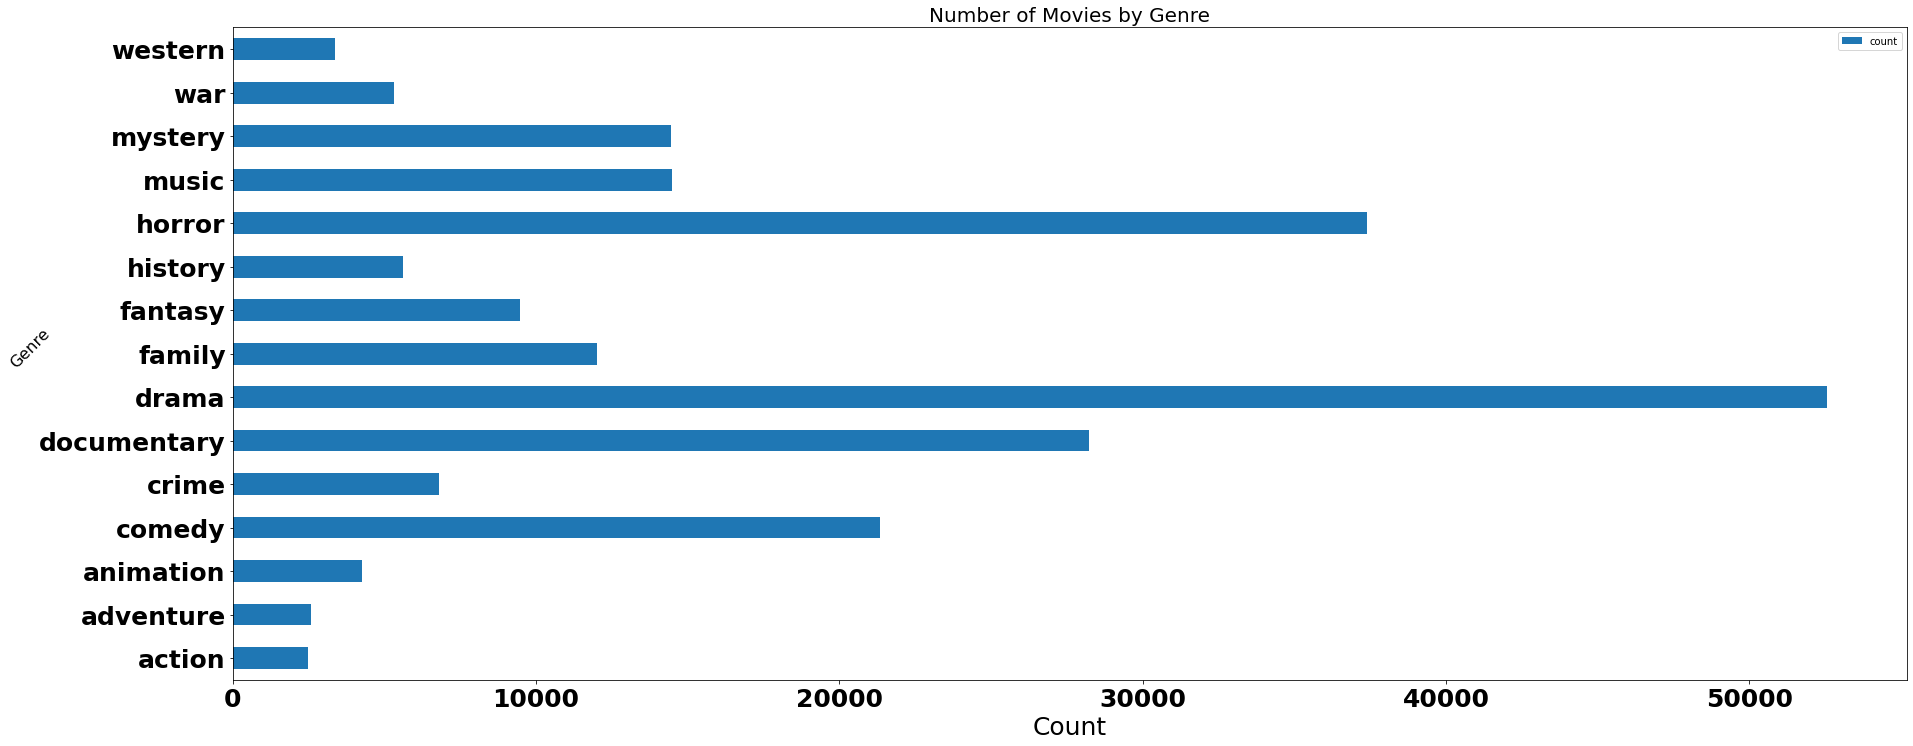

In [80]:
fig, ax = plt.subplots(figsize=(30, 12))  # Swap the figsize dimensions

# Use horizontal bar plot instead of vertical bar plot
genres_to_plot.plot.barh(y='count', x='genre', ax=ax, rot=0)

# Set the axis labels and title
ax.set_xlabel("Count", fontsize=25)  # Swap x and y labels
ax.set_ylabel("Genre", fontsize=25)  # Swap x and y labels
ax.set_ylabel("Genre", fontsize=16, rotation=45)

ax.set_title("Number of Movies by Genre", fontsize=20)

# Set the tick label font size
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')

# Show the chart
plt.show()

In [ ]:
GENRES7